In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables
#print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets- targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
        
    ])
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6992 - mae: 0.6071


[0.6991761326789856, 0.6070653200149536]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

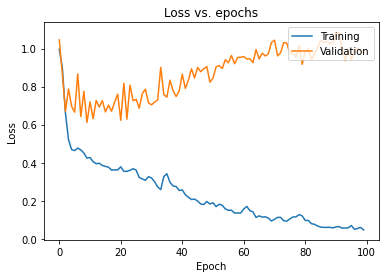

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [16]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False)

In [18]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6064 - mae: 0.5897


[0.6063978672027588, 0.5896511077880859]

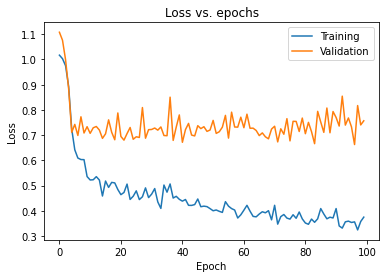

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [20]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training...")
    
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Started batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")
    
    

In [21]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Started batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
      
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [22]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Started batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
      
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [23]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [24]:
# Compile the model

model.compile(optimizer="adam", loss="mse")

In [25]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Started batch 0
Training: Finished batch 0
Training: Started batch 1
Training: Finished batch 1
Training: Started batch 2
Training: Finished batch 2
Training: Started batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Started batch 0
Training: Finished batch 0
Training: Started batch 1
Training: Finished batch 1
Training: Started batch 2
Training: Finished batch 2
Training: Started batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Started batch 0
Training: Finished batch 0
Training: Started batch 1
Training: Finished batch 1
Training: Started batch 2
Training: Finished batch 2
Training: Started batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [26]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Started batch 0
Testing: Finished batch 0
Testing: Started batch 1
Testing: Finished batch 1
Finished testing!


0.7718812823295593

In [27]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Started batch 0
Prediction: Finished batch 0
Prediction: Started batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.02953512],
       [ 0.01952516],
       [-0.02013866],
       [-0.04004689],
       [ 0.02054098],
       [-0.04598033],
       [ 0.02385395],
       [-0.03069338],
       [-0.0172471 ],
       [ 0.01834844],
       [-0.07094436],
       [-0.04007685],
       [ 0.03095778],
       [-0.03816289],
       [-0.06444984],
       [ 0.02156448],
       [ 0.0318362 ],
       [ 0.03157073],
       [ 0.01319208],
       [ 0.03399993],
       [-0.06217898],
       [ 0.01583795],
       [ 0.03282142],
       [-0.00470175],
       [ 0.03323909],
       [-0.06765751],
       [ 0.02211845],
       [ 0.02446788],
       [-0.01419441],
       [-0.02616984],
       [ 0.00749862],
       [-0.04322219],
       [-0.04408035],
       [ 0.02928405],
       [-0.03491596],
       [ 0.00588999],
       [ 0.02388223],
       [ 0.0290511 ],
       [-0.04646499],
       [-0.06417418],
       [ 0.02472161],
       [-0.00868388],
       [ 0.01037359],
       [ 0.01072782],
       [-0.04960421]], dtype=flo

In [28]:
# Re-train the unregularised model
unregularized_model= get_model()
unregularized_model.compile(optimizer="adam", loss="mse")
unreg_history= unregularized_model.fit(train_data, train_targets, epochs=100, 
                                     validation_split=0.15, batch_size=64, verbose=False, 
                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [29]:
unregularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5081


0.5081011652946472

In [30]:
# Re-train the regularised model

regularized_model= get_regularised_model(1e-8, 0.2)
regularized_model.compile(optimizer="adam", loss="mse")
reg_history= regularized_model.fit(train_data, train_targets, epochs=100, 
                                     validation_split=0.15, batch_size=64, verbose=False, 
                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])



In [31]:
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5712


0.571172833442688

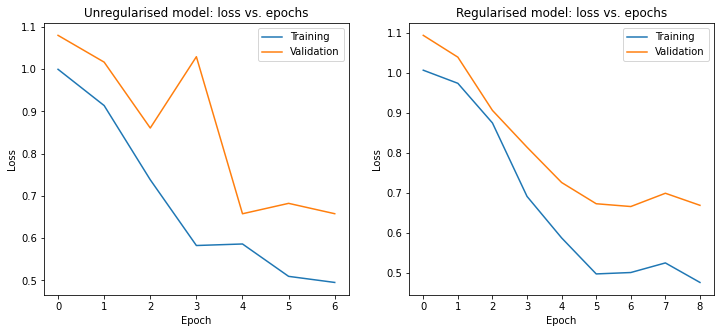

In [32]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()